# Applying UMAP and K Means Clustering 
## Actual Number of Speakers in the 180s audio = 4


In [199]:
import numpy as np
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#embedding of 177, 3sec audios as row vctors in a matrix
audio_matrix = np.loadtxt("/Users/abhinav/Downloads/wav_vecs.txt")
audio_matrix = umap.UMAP(n_neighbors=5, min_dist=0.5).fit_transform(audio_matrix)

np.random.shuffle(audio_matrix)


# Apply k-means clustering
num_speakers = 0  

#desired number of clusters (number of speakers)
k = 4
#k-means clustering
kmeans = KMeans(n_clusters=k, n_init = 10)
kmeans.fit(audio_matrix)

# Get the cluster labels assigned to each audio sample
labels = kmeans.labels_

# Count the unique cluster labels to determine the number of speakers
num_speakers = len(np.unique(labels))

# Print the total number of speakers
print("Total number of speakers:", num_speakers)


Total number of speakers: 4


In [200]:
m = np.loadtxt("/Users/abhinav/Downloads/wav_vector")
m.shape

(177, 192)

In [201]:
labels

array([3, 2, 3, 1, 1, 3, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 3, 2, 2, 2, 0,
       0, 3, 1, 2, 2, 2, 2, 3, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 3, 3, 2, 1,
       1, 1, 2, 0, 2, 0, 0, 0, 3, 3, 1, 3, 2, 1, 1, 1, 3, 1, 0, 0, 3, 1,
       2, 0, 3, 1, 1, 0, 3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 2, 1, 3, 3, 1, 0,
       3, 2, 2, 2, 2, 3, 2, 0, 0, 2, 0, 2, 0, 1, 3, 3, 2, 0, 3, 3, 2, 2,
       3, 2, 0, 1, 2, 2, 0, 3, 0, 0, 0, 3, 0, 2, 2, 1, 2, 3, 0, 0, 3, 2,
       3, 0, 0, 2, 3, 1, 2, 0, 1, 0, 1, 3, 2, 0, 1, 0, 3, 0, 1, 3, 1, 1,
       0, 1, 0, 2, 0, 2, 0, 1, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0, 1, 2, 0, 1,
       3], dtype=int32)

## Optimal number of clusters by analyzing WCSS

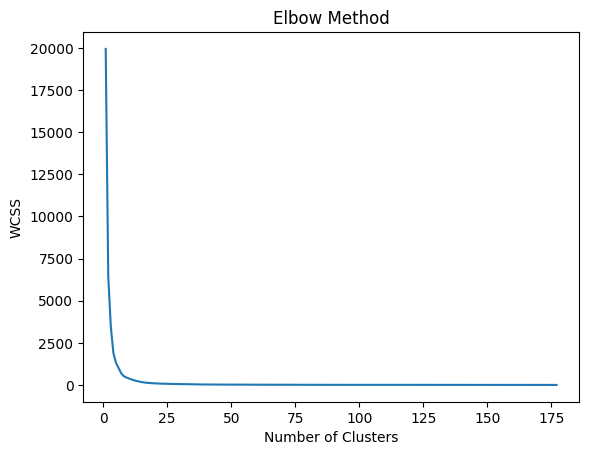

In [202]:
# Set the range of clusters to evaluate optimal number of clusters
min_clusters = 1
max_clusters = 177
wcss = []  # List to store within-cluster sum of squares

Audio_matrix = np.loadtxt("/Users/abhinav/Downloads/wav_vecs.txt")
Audio_matrix = umap.UMAP(n_neighbors=5, min_dist=0.5).fit_transform(audio_matrix)

for k in range(min_clusters, max_clusters + 1):
    #k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Audio_matrix)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Elbow, seems to lie before 15, well before 25

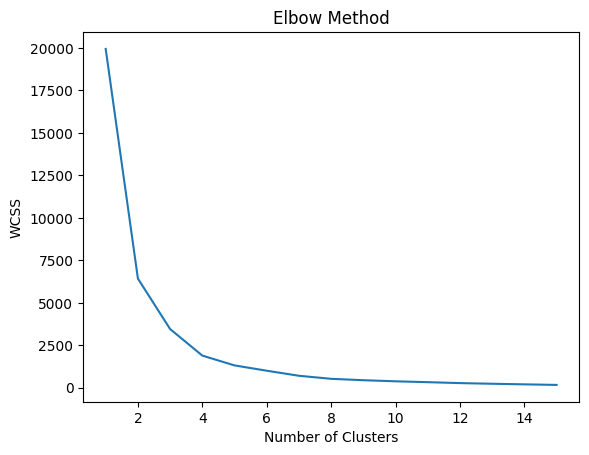

In [203]:
# Set the range of clusters to evaluate optimal number of clusters
min_clusters = 1
max_clusters = 15
wcss = []  # List to store within-cluster sum of squares

for k in range(min_clusters, max_clusters + 1):
    #k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Audio_matrix)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

optimal number of speakers [5-1,5+1]

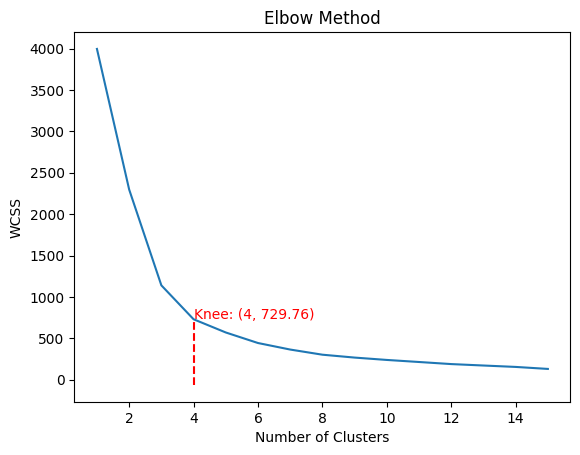

In [204]:
!pip install kneed

import numpy as np
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Set the range of clusters to evaluate the optimal number of clusters
min_clusters = 1
max_clusters = 15
wcss = []  # List to store within-cluster sum of squares

Audio_matrix = np.loadtxt("/Users/abhinav/Downloads/wav_vecs.txt")
Audio_matrix = umap.UMAP(n_neighbors=5, min_dist=0.5).fit_transform(Audio_matrix)

for k in range(min_clusters, max_clusters + 1):
    # k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Audio_matrix)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Locate the knee
knee = KneeLocator(range(min_clusters, max_clusters + 1), wcss, curve='convex', direction='decreasing')
knee_x = knee.knee
knee_y = knee.elbow_y
plt.vlines(knee_x, plt.ylim()[0], knee_y, linestyles='dashed', colors='red')
plt.text(knee_x, knee_y, f'Knee: ({knee_x}, {knee_y:.2f})', color='red')

plt.show()


# GROUND TRUTH LABELS

In [205]:
import numpy as np

q = [6,12,13,14,15,16,17,21,22,23,27,40,41,42,43,44,45,46,53,57,58,59,60,65,71,72,75,76,77,84,]
lab = np.zeros(177)
for i in range (0,len(q)):
    lab[q[i]] = -1
    

k = [[0,5],[18,20],[61,64],[90,117],[47,52]]
for i in range (0,len(k)):
    for j in range (k[i][0],k[i][1]+1):
        lab[j] = 2
        
k = [[7,11],[73,74],[85,89],[128,136],[162,169]]
for i in range (0,len(k)):
    for j in range (k[i][0],k[i][1]+1):
        lab[j] = 1
        
k = [[24,26],[28,33],[54,56],[137,143],[144,153],[66,70]]
for i in range (0,len(k)):
    for j in range (k[i][0],k[i][1]+1):
        lab[j] = 4
        
k = [[34,39],[78,83],[118,127],[154,161],[170,176]]
for i in range (0,len(k)):
    for j in range (k[i][0],k[i][1]+1):
        lab[j] = 3
        

lab


array([ 2.,  2.,  2.,  2.,  2.,  2., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1.,  2.,  2.,  2., -1., -1., -1.,  4.,  4.,
        4., -1.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  3.,  3.,
        3., -1., -1., -1., -1., -1., -1., -1.,  2.,  2.,  2.,  2.,  2.,
        2., -1.,  4.,  4.,  4., -1., -1., -1., -1.,  2.,  2.,  2.,  2.,
       -1.,  4.,  4.,  4.,  4.,  4., -1., -1.,  1.,  1., -1., -1., -1.,
        3.,  3.,  3.,  3.,  3.,  3., -1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])

# Umap Visulaisation labelled with Ground T  (-1 labels are Ovelapped audios)

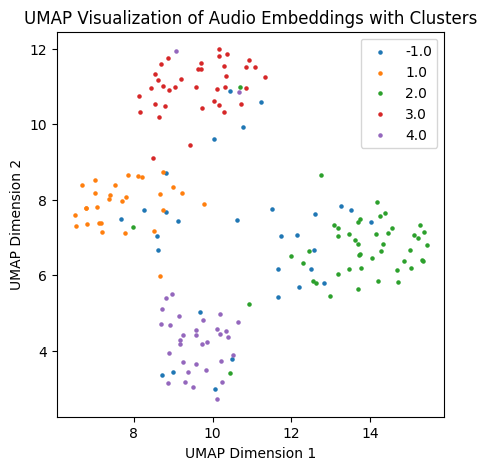

In [206]:
import numpy as np
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the audio_matrix
audio_matrix = np.loadtxt("/Users/abhinav/Downloads/wav_vecs.txt")

audio_matrix = StandardScaler().fit_transform(audio_matrix)

# Apply UMAP for dimensionality reduction
umap_params = {
    'n_neighbors': 15,
    'min_dist': 0.4,
    'metric': 'euclidean',
    'n_components': 2,
    'random_state': 42
   
}
embedding = umap.UMAP(**umap_params).fit_transform(audio_matrix)

# Get unique labels
plt.figure(figsize=(5, 5))
unique_labels = np.unique(lab)

# Create a scatter plot with distinct labels
for label in unique_labels:
    indices = np.where(lab == label)
    plt.scatter(embedding[indices, 0], embedding[indices, 1], label=label, s=5)

# Set plot title and axis labels
plt.title("UMAP Visualization of Audio Embeddings with Clusters")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Show the legend
plt.legend()

# Display the plot
plt.show()


Clusters well seperated for k == 4

# Applying PCA, labelled by Ground truth 

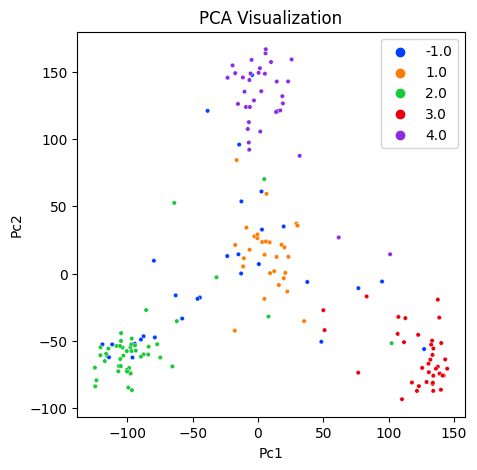

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the matrix from file
matrix = np.loadtxt("/Users/abhinav/Downloads/wav_vecs.txt")


# Apply PCA
pca = PCA(n_components=2)  
matrix_pca = pca.fit_transform(matrix)          

df = pd.DataFrame(matrix_pca, columns=["pca-one", "pca-two"])

plt.figure(figsize=(5, 5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=lab,
    palette=sns.color_palette("bright", 5),
    data=df,
    legend="full",
    alpha=1,
    s = 10
)

plt.xlabel("Pc1")
plt.ylabel("Pc2")
plt.title("PCA Visualization")
plt.show()


# Applying tSNE, labelled with ground truth

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.001s...
[t-SNE] Computed neighbors for 177 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 104.806481
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.091148
[t-SNE] KL divergence after 500 iterations: 0.237636
t-SNE done! Time elapsed: 0.8178880214691162 seconds


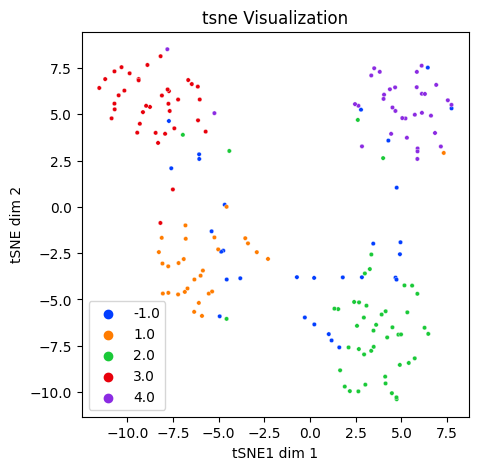

In [195]:
import time
from sklearn.manifold import TSNE

matrix = np.loadtxt("/Users/abhinav/Downloads/wav_vecs.txt")

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(matrix)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


df = pd.DataFrame(tsne_results, columns=["pca-one", "pca-two"])
#df["y"] = np.random.randint(0, 10, size=len(df))   No labels



plt.figure(figsize=(5, 5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=lab,
    palette=sns.color_palette("bright", 5),
    data=df,
    legend="full",
    alpha=1,
    s = 10
  
)

plt.xlabel("tSNE1 dim 1")
plt.ylabel("tSNE dim 2")
plt.title("tsne Visualization")
plt.show()


# K Means, without UMAP

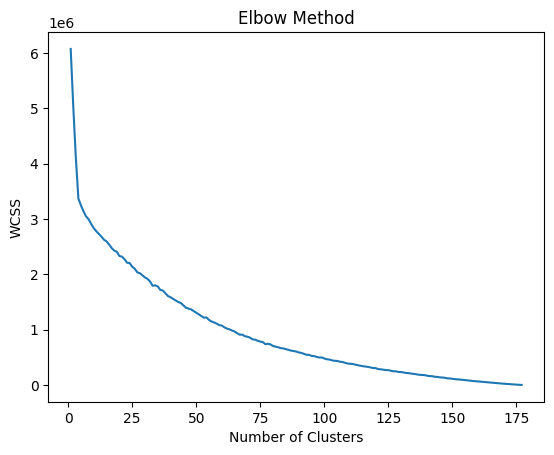

In [196]:
# Set the range of clusters to evaluate optimal number of clusters
min_clusters = 1
max_clusters = 177
wcss = []  # List to store within-cluster sum of squares

Audio_matrix = np.loadtxt("/Users/abhinav/Downloads/wav_vecs.txt")

for k in range(min_clusters, max_clusters + 1):
    #k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Audio_matrix)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

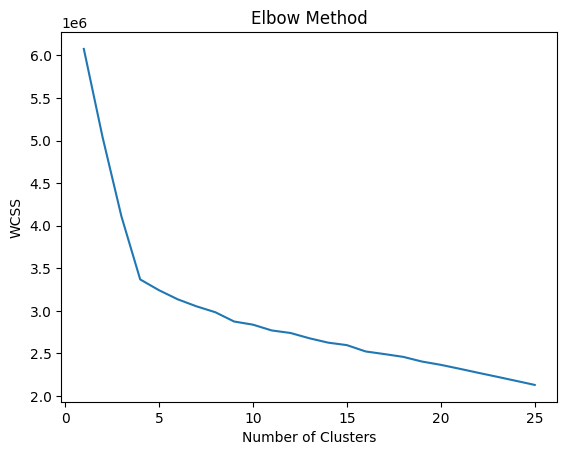

In [197]:
# Set the range of clusters to evaluate optimal number of clusters
min_clusters = 1
max_clusters = 25
wcss = []  # List to store within-cluster sum of squares

for k in range(min_clusters, max_clusters + 1):
    #k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Audio_matrix)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()